In [76]:
import os
os.makedirs("test/testdir")

In [77]:
os.makedirs("test/testtest")

In [78]:
os.makedirs("test/testdir")

FileExistsError: [Errno 17] File exists: 'test/testdir'

In [5]:
0.1 / 1000

0.0001

In [60]:
import numpy as np
import scipy as sp
chirp_turns=25
chirp_repetitions=500
chirp_rep_time=.1/1000
turn_freq=470151.0308
chirp_start_freq=2e4
chirp_stop_freq=8e4
sampling_freq=1e6
    
total_signal_time = chirp_repetitions * chirp_rep_time
chirp_length_time = chirp_turns / turn_freq
# Generate one chirp
chirp_time_samples = np.arange(0, chirp_length_time, 1/sampling_freq)
chirp_signal_samples = sp.signal.chirp(chirp_time_samples, chirp_start_freq, chirp_length_time, chirp_stop_freq)

# Generate one repetition
rep_time_samples = np.arange(0, chirp_rep_time, 1/sampling_freq)[:-1] # cut off the end for the next repetition


In [61]:
chirp_rep_time * sampling_freq

100.0

In [62]:
chirp_length_time * sampling_freq

53.174402186166596

In [56]:
int(chirp_rep_time * sampling_freq - chirp_length_time * sampling_freq)

46

In [ ]:

rep_signal_samples = np.pad(chirp_signal_samples, 
                            (0, int(chirp_rep_time * sampling_freq - chirp_length_time * sampling_freq)), 
                            'constant', 
                            constant_values=(0, 0))

# Generate full signal
time_samples = np.arange(0, total_signal_time, 1/sampling_freq)[:-1] # cut off the end for the next repetition
signal_samples = np.pad(
    rep_signal_samples,
    (0, len(rep_signal_samples)*(chirp_repetitions-1)),
    'wrap'
)

# calculate the number of turns
total_time = chirp_rep_time * chirp_repetitions
total_turns = total_time * turn_freq
#return time_samples, signal_samples, total_turns

In [6]:
from signal_gen import generate_chirp_signal
generate_chirp_signal(chirp_rep_time=0.1/1000)

ValueError: index can't contain negative values

In [9]:
import numpy as np
np.concatenate((np.arange(0.1, 1, 0.1), np.arange(1, 11, 1)))


array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  2. ,
        3. ,  4. ,  5. ,  6. ,  7. ,  8. ,  9. , 10. ])

In [2]:
1/473128.56479373755 * 1000

0.0021135904158227146

In [5]:
import numpy as np

import xobjects as xo
import xtrack as xt
import xpart as xp

import time

## Generate a simple line
line = xt.Line(
    elements=[xt.Drift(length=2.),
              xt.Multipole(knl=[0, 1.], ksl=[0,0]),
              xt.Drift(length=1.),
              xt.Multipole(knl=[0, -1.], ksl=[0,0])],
    element_names=['drift_0', 'quad_0', 'drift_1', 'quad_1'])

## Attach a reference particle to the line (optional)
## (defines the reference mass, charge and energy)
line.particle_ref = xp.Particles(p0c=6500e9, #eV
                                 q0=1, mass0=xp.PROTON_MASS_EV)

## Choose a context
#context = xo.ContextCpu()         # For CPU
# context = xo.ContextCupy()      # For CUDA GPUs
context = xo.ContextPyopencl()  # For OpenCL GPUs

## Transfer lattice on context and compile tracking code
line.build_tracker(_context=context)

## Build particle object on context
n_part = 200
particles = xp.Particles(p0c=6500e9, #eV
                        q0=1, mass0=xp.PROTON_MASS_EV,
                        x=np.random.uniform(-1e-3, 1e-3, n_part),
                        px=np.random.uniform(-1e-5, 1e-5, n_part),
                        y=np.random.uniform(-2e-3, 2e-3, n_part),
                        py=np.random.uniform(-3e-5, 3e-5, n_part),
                        zeta=np.random.uniform(-1e-2, 1e-2, n_part),
                        delta=np.random.uniform(-1e-4, 1e-4, n_part),
                        _context=context)
time_before = time.time()
## Track (saving turn-by-turn data)
n_turns = 10000
line.track(particles, num_turns=n_turns,
              turn_by_turn_monitor=True)
time_after = time.time()

print(time_after - time_before)

## Turn-by-turn data is available at:
line.record_last_track.x
line.record_last_track.px

0.2932710647583008


array([[ 6.52552169e-06,  5.99913856e-04, -6.41793515e-06, ...,
         3.79691759e-04,  4.64547430e-04, -3.79608449e-04],
       [-5.56242715e-06, -3.21575080e-04,  5.67474146e-06, ...,
         6.14650006e-05,  3.15685562e-04, -6.15752579e-05],
       [-7.62212928e-06, -4.11644501e-04,  7.65146255e-06, ...,
        -3.83149330e-04,  1.50699107e-04,  3.83138591e-04],
       ...,
       [ 2.37235404e-06,  4.82165121e-04, -2.18652231e-06, ...,
        -1.65679520e-04,  4.52780052e-04,  1.65854026e-04],
       [ 9.03052013e-06,  1.11065644e-04, -9.03335545e-06, ...,
         1.09013560e-04, -2.30924484e-05, -1.09012971e-04],
       [-8.12144605e-07, -5.90039544e-04,  6.29514970e-07, ...,
        -1.47683279e-05, -5.89857413e-04,  1.45857547e-05]])

: 

CPU: 0.4070110321044922


OpenCL: 0.2932710647583008

In [2]:
import time
before_times = time.time()
time.sleep(5)
after_times = time.time()
print(after_times - before_times)

5.0058019161224365


In [ ]:
import numpy as np
c = 299792458
E0 = 0.93827e9
mu0 = 2 * np.pi * 10e-7



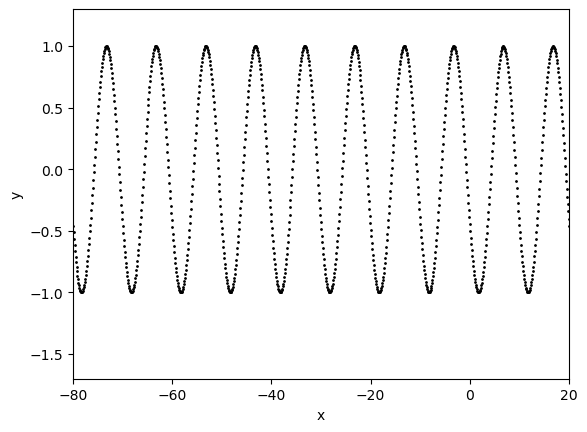

In [9]:
import matplotlib.pyplot as plt
from matplotlib import animation
import numpy as np

fig, ax = plt.subplots()

ax.set_ylim(-1.7, 1.3)
ax.set_xlim(-80, 20)
ax.set_xlabel("x")
ax.set_ylabel("y")

line, = ax.plot([], [], 'k.', markersize=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):

    x = np.linspace(-80, 20, 1000)
    y = np.sin(2*np.pi*x/10 + i/10)
    line.set_data(x, y)
    return line,

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=1, blit=True)
anim.save(f'test.gif', 
          writer=animation.PillowWriter(fps=30),
          )
plt.show()


In [3]:
start = 5
stop = 10
turn = 5

delta = (stop-start)/turn

In [66]:
import pandas as pd

df = pd.DataFrame()

In [67]:
df

Empty DataFrame
Columns: []
Index: []

In [4]:
delta

1.0

In [62]:
import xtrack as xt
import xpart as xp
import xobjects as xo
import numpy as np

line = xt.Line(
    elements=[xt.Drift(length=2.),
              xt.Multipole(knl=[0, 1.], ksl=[0,0]),
              xt.Drift(length=1.),
              xt.Multipole(knl=[0, -1.], ksl=[0,0])],
    element_names=['drift_0', 'quad_0', 'drift_1', 'quad_1'])

line.particle_ref = xp.Particles(p0c=6500e9, #eV
                                 q0=1, mass0=xp.PROTON_MASS_EV)
context = xo.ContextCpu()         # For CPU
line.build_tracker(_context=context)
n_part = 500
particles = xp.Particles(p0c=6500e9, #eV
                        q0=1, mass0=xp.PROTON_MASS_EV,
                        x=np.random.uniform(-1e-3, 1e-3, n_part),
                        px=np.random.uniform(-1e-5, 1e-5, n_part),
                        y=np.random.uniform(-2e-3, 2e-3, n_part),
                        py=np.random.uniform(-3e-5, 3e-5, n_part),
                        zeta=np.random.uniform(-1e-2, 1e-2, n_part),
                        delta=np.random.uniform(-1e-4, 1e-4, n_part),
                        _context=context)
n_turns = 100
# line.track(particles, num_turns=n_turns)
parts = []
for x, px, y, py, zeta, delta in list(zip(particles.x, particles.px, particles.y, particles.py, particles.zeta, particles.delta)):
    particle = xp.Particles(p0c=6500e9, #eV
                            q0=1, mass0=xp.PROTON_MASS_EV,
                            x=x, px=px, y=y, py=py, zeta=zeta, delta=delta,
                            _context=context)
    line.track(particle, num_turns=int(n_turns/2))
    # shift particle by a random amount in x
    particle.x += np.random.uniform(-1e-3, 1e-3)
    line.track(particle, num_turns=int(n_turns/2))
    parts.append(particle)


generating ./b5ecbe56c8514dba989c8d7e635af0df.c
the current directory is '/Users/ash/cern/dev/md9044/analysis/simulation'


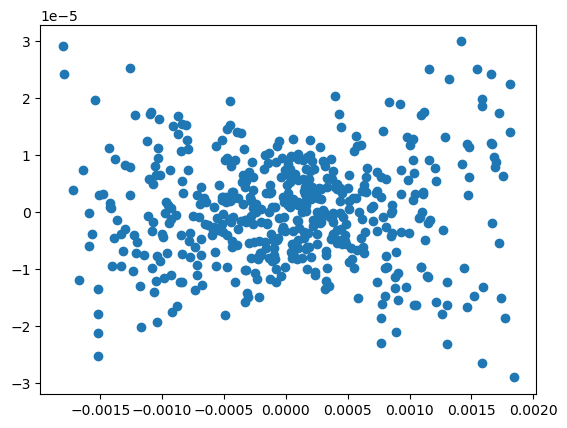

In [63]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for part in parts:
    ax.plot(part.x, part.px, c='C0', marker='o')

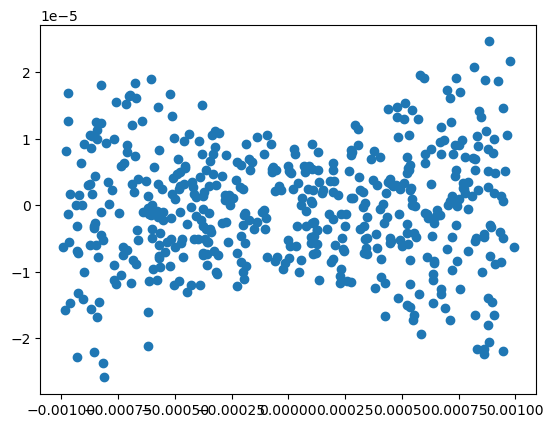

In [61]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for part in parts:
    ax.plot(part.x, part.px, c='C0', marker='o')

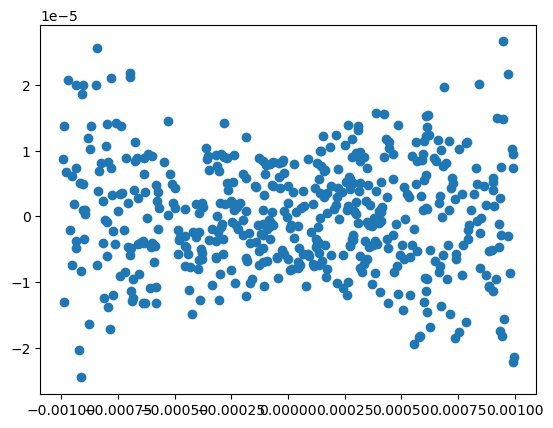

In [46]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(particles.x, particles.px)

In [14]:
import pandas as pd
df = pd.read_parquet("QTRACK_Q0.33_S-15/particles.parquet")

In [11]:
arr = np.memmap("test.np", mode='r', shape=test_arr.shape, dtype='int64')


In [12]:
arr

memmap([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [8]:
import numpy as np
test_arr = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
mmp = np.memmap('test.np', mode='w+', dtype='int64', shape=test_arr.shape)
mmp[:] = test_arr[:]

In [5]:
test_arr.shape

(10,)

In [29]:
for i in range(1010):
    print(f"{i:>4}")

   0
   1
   2
   3
   4
   5
   6
   7
   8
   9
  10
  11
  12
  13
  14
  15
  16
  17
  18
  19
  20
  21
  22
  23
  24
  25
  26
  27
  28
  29
  30
  31
  32
  33
  34
  35
  36
  37
  38
  39
  40
  41
  42
  43
  44
  45
  46
  47
  48
  49
  50
  51
  52
  53
  54
  55
  56
  57
  58
  59
  60
  61
  62
  63
  64
  65
  66
  67
  68
  69
  70
  71
  72
  73
  74
  75
  76
  77
  78
  79
  80
  81
  82
  83
  84
  85
  86
  87
  88
  89
  90
  91
  92
  93
  94
  95
  96
  97
  98
  99
 100
 101
 102
 103
 104
 105
 106
 107
 108
 109
 110
 111
 112
 113
 114
 115
 116
 117
 118
 119
 120
 121
 122
 123
 124
 125
 126
 127
 128
 129
 130
 131
 132
 133
 134
 135
 136
 137
 138
 139
 140
 141
 142
 143
 144
 145
 146
 147
 148
 149
 150
 151
 152
 153
 154
 155
 156
 157
 158
 159
 160
 161
 162
 163
 164
 165
 166
 167
 168
 169
 170
 171
 172
 173
 174
 175
 176
 177
 178
 179
 180
 181
 182
 183
 184
 185
 186
 187
 188
 189
 190
 191
 192
 193
 194
 195
 196
 197
 198
 199


In [27]:
import matplotlib

cmap = matplotlib.cm.get_cmap('Spectral')

rgba = cmap(1/6)
print(rgba)

(0.9139561707035756, 0.36239907727797, 0.27935409457900806, 1.0)


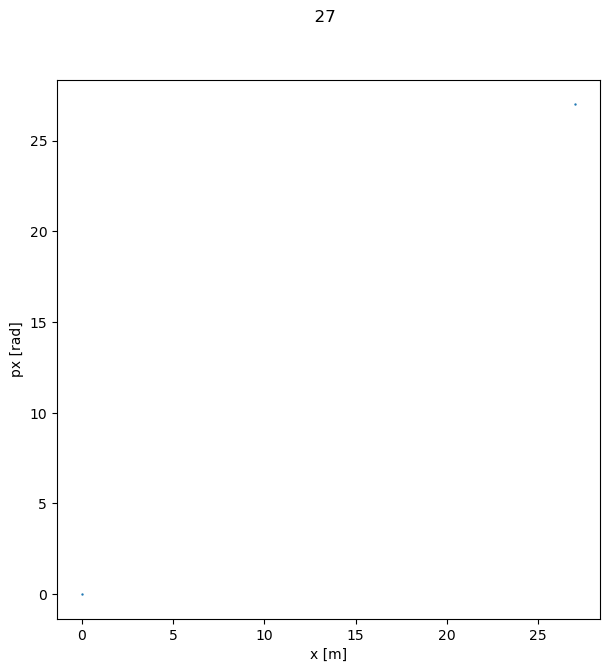

In [25]:
from matplotlib.animation import FuncAnimation, PillowWriter
fig, ax = plt.subplots(figsize=(7, 7), tight_layout=False)

OFFSET = 0
REPS = 30

def animate(i):
    ax.clear()
    #ax.set_aspect("equal")
    ax.set_xlabel("x [m]")
    ax.set_ylabel("px [rad]")
    fig.suptitle(f"{OFFSET+(i*3):>4}")
    try:
        ax.scatter([0, i*3], [0, i*3], marker='.', s=2)
    except:
        print("fail at", OFFSET+(i*3))
        pass
    return
ani = FuncAnimation(fig, animate, interval=1, blit=False, repeat=False, frames=int(REPS/3))
ani.save("QTRACK_quad_collapse_rfko.gif", writer=PillowWriter(fps=30))


In [1]:
from progressbar import progressbar
import time
import xobjects as xo
import xtrack as xt
import xpart as xp
import numpy as np

<frozen importlib._bootstrap>:241: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [9]:
line = xt.Line(
    elements=[xt.Drift(length=2.),
              xt.Multipole(knl=[0.01, 0], ksl=[0,0]),
              xt.Drift(length=2.),
              xt.Multipole(knl=[-0.01, 0.], ksl=[0,0])],
    element_names=['drift_0', 'quad_0', 'drift_1', 'quad_1'])
line.particle_ref = xp.Particles(p0c=6500e9, #eV
                                 q0=1, mass0=xp.PROTON_MASS_EV)
context = xo.ContextCpu()         # For CPU
line.build_tracker(_context=context)
n_part = 200
particles = xp.Particles(p0c=6500e9, #eV
                        q0=1, mass0=xp.PROTON_MASS_EV,
                        x=np.random.uniform(-1e-3, 1e-3, n_part),
                        px=np.random.uniform(-1e-5, 1e-5, n_part),
                        y=np.random.uniform(-2e-3, 2e-3, n_part),
                        py=np.random.uniform(-3e-5, 3e-5, n_part),
                        zeta=np.random.uniform(-1e-2, 1e-2, n_part),
                        delta=np.random.uniform(-1e-4, 1e-4, n_part),
                        _context=context)
n_turns = 100

generating ./b7de7944ca4d4d6b97669c0ec1ab6130.c
the current directory is '/Users/ash/cern/dev/md9044/analysis/simulation'


In [10]:
line.track(particles, num_turns=n_turns, turn_by_turn_monitor=True)


In [14]:
line.record_last_track.x.T[0]

(200,)

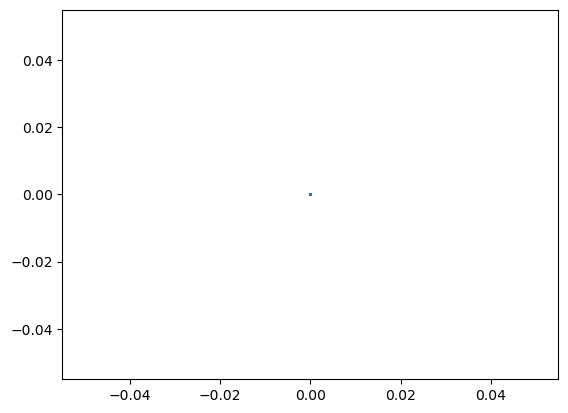

In [23]:
import matplotlib.pyplot as plt
cm = plt.get_cmap("viridis")

fig, ax = plt.subplots()
ax.plot(line.record_last_track.x.T[52], line.record_last_track.px.T[52], 'o', markersize=1)

In [45]:
line.record_last_track.x.shape

(200, 1)

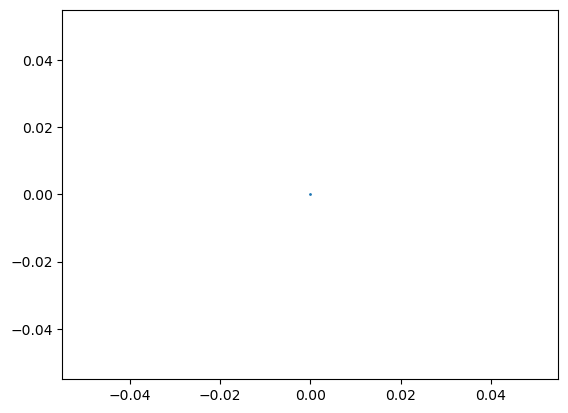

In [44]:
import matplotlib.pyplot as plt
cm = plt.get_cmap("viridis")

fig, ax = plt.subplots()
ax.plot(line.record_last_track.x[-1], line.record_last_track.px[-1], 'o', markersize=1)

In [18]:
import numpy as np
import scipy as sp

chirp_turns=100
chirp_repetitions=500
chirp_rep_time=0.001
turn_freq=100
chirp_start_freq=10
chirp_stop_freq=40
sampling_freq=1e6

# Calculate the signal time for one chirp
chirp_length_time = chirp_turns / turn_freq
# Generate one chirp
chirp_time_samples = np.arange(0, chirp_length_time, 1/sampling_freq)
chirp_signal_samples = sp.signal.chirp(chirp_time_samples, chirp_start_freq, chirp_length_time, chirp_stop_freq)

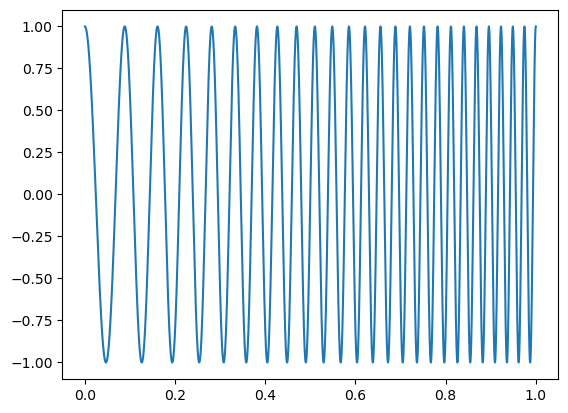

In [19]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(chirp_time_samples, chirp_signal_samples)

In [20]:
n_turns = 100
f_rev = 100

f_ex = 10

total_time = n_turns / f_rev

time = np.arange(0, total_time, 1/sampling_freq)

samples = np.sin(2*np.pi*f_ex*time)

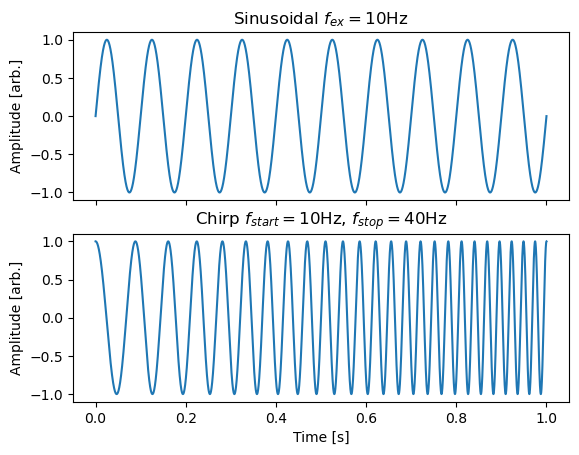

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(time, samples)
ax[1].plot(chirp_time_samples, chirp_signal_samples)

ax[1].set_xlabel('Time [s]')
ax[1].set_ylabel('Amplitude [arb.]')
ax[0].set_ylabel('Amplitude [arb.]')
ax[0].set_title(r"Sinusoidal $f_{ex}=10$Hz")

ax[1].set_title(r"Chirp $f_{start}=10$Hz, $f_{stop}=40$Hz")

fig.savefig("exciter_signals.png")